## Obtain ADS API key

In [2]:
ADS_URL = "https://ads.atmosphere.copernicus.eu/api/v2"

ADS_KEY = "8089:4c1cd739-4ef0-43c2-be7f-3120e8d7c96f"

## Install API

- Install the API that will allow you to download CAMS data programmatically
- Note: Using a command without ! in the terminal is the same as using the command with ! in a Jupyter notebook

In [3]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.5.1-py2.py3-none-any.whl size=11688 sha256=b8067e978bf96b7bcf1c083def836e2f6f227e94b1a6d5331126fb08eebd461d
  Stored in directory: /Users/xchen/Library/Caches/pip/wheels/8b/19/90/0f30bd354f0c245f87c1d7639466d05c6b028d3acb4a64cbed
Successfully built cdsapi


## Import libraries

In [99]:
# CDS API
import cdsapi

# For working with multidimensional array
import numpy as np
import xarray as xr
# ref: http://xarray.pydata.org/en/stable/getting-started-guide/installing.html


# For plotting and visualising data
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Others  ??
from zipfile import ZipFile   
from IPython.display import clear_output  
from time import sleep  


## CAMS global atmospheric composition data

- Search for data on the ADS; ADS website: https://ads.atmosphere.copernicus.eu 
- search: CAMS global atmospheric composition forecasts






In [7]:
import cdsapi

c = cdsapi.Client(url = ADS_URL, key = ADS_KEY)

c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'date': '2021-08-01/2021-08-08',
        'type': 'forecast',
        'format': 'netcdf_zip',
        'variable': [
            'dust_aerosol_optical_depth_550nm', 
            'organic_matter_aerosol_optical_depth_550nm', 
            'total_aerosol_optical_depth_550nm',
        ],
        'time': [
            '00:00', '12:00',
        ],
        'leadtime_hour': '0',
        'area': [
            80, -150, 25,
            150,
        ],
    },
    'download.netcdf_zip')

/Users/xchen/opt/miniconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-12-05 22:33:45,106 INFO Welcome to the CDS
2021-12-05 22:33:45,107 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-atmospheric-composition-forecasts
/Users/xchen/opt/miniconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-12-05 22:33:45,169 INFO Request is completed
2021-12-05 22:33:45,170 INFO Downloading https://download-0003.copernicus-

Result(content_length=9954624,content_type=application/zip,location=https://download-0003.copernicus-atmosphere.eu/cache-compute-0003/cache/data1/adaptor.mars_constrained.external-1637877067.6985812-16048-3-ad18cc54-2e99-4799-87e6-bccb87dded35.zip)

## Read Data
- Have requested the data in NetCDF format, a commonly used format for gridded (array-based) scientific data
- To read and process this data we will make use of the Xarray library
- Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient
- read the data from our NetCDF file into an Xarray "dataset"

In [13]:
# Creat a ZipFile Object and load zip file in it
       
with ZipFile(f'./2021-08_NHemisphere_AQ.zip', 'r') as zipObj:
    zipObj.extractall(path = f'./2021-08_NHemisphere_AQ/')

Rename the file (data.nc) name in the 2021-08_NHemisphere_AQ folder

In [14]:
fn = f'./2021-08_NHemisphere_AQ/data.nc'

Now read the data into Xarray dataset

In [16]:
# Create Xarray Dataset
ds = xr.open_dataset(fn)

# ref:https://github.com/ecmwf/eccodes-python#system-dependencies

In [17]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 751, latitude: 138, time: 16)
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... 149.2 149.6 150.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T12:00:00
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
    aod550     (time, latitude, longitude) float32 ...
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-25 21:51:07 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

## look more carefully at the "Total Aerosol Optical Depth at 550nm" dataset

- An Xarray __dataset__ may contain multiple variables
- But an Xarray __data array__ holds a single multi-dimensional variable and its coords
- To make the processing of the __omaod550__ data easier, we convert in into an Xarray data array.

In [18]:
# Creat an Xarray data array

da = ds['omaod550']

In [19]:
da

<xarray.DataArray 'omaod550' (time: 16, latitude: 138, longitude: 751)>
[1658208 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... 149.2 149.6 150.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T12:00:00
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

### Now view this data, initially for just one time step

In [28]:
time_step = 0

In [22]:
# create the figure panel
fig = plt.figure(figsize = (10, 5)) # Define the figure and specify size
fig2 = plt.figure(figsize = (10, 5), dpi = 80) # modify resolution per inch

<Figure size 720x360 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [21]:
??plt.figure
# figsize : (float, float), default: :rc:`figure.figsize`
#        Width, height in inches.

#    dpi : float, default: :rc:`figure.dpi`
#        The resolution of the figure in dots-per-inch.



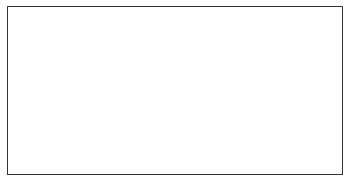

In [24]:
# Add an Axes to the current figure or retrieve an existing Axes;
# create the map using the cartopy PlateCarree projection
ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())

# ref:https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
# cartopy.crs.Mollweide(central_longitude=0, globe=None)

In [25]:
# Specify geographical extent
ax.set_extent([-150, -50, 25, 80], crs = ccrs.PlateCarree())

In [26]:
# Add lat/lon grid
#ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 

ax.gridlines(draw_labels = True, linewidth = 1, color = 'gray', 
            alpha = .5, linestyle = "--")

In [29]:
# Set figure title
#ax.set_title(f'Organic Matter AOD at 550nm, {da.time[time_step].values}', fontsize=12) 

ax.set_title(f'Organic Matter AOD at 550nm, {da.time[time_step].values}',
            fontsize = 12)

Text(0.5, 1.0, 'Organic Matter AOD at 550nm, 2021-08-01T00:00:00.000000000')

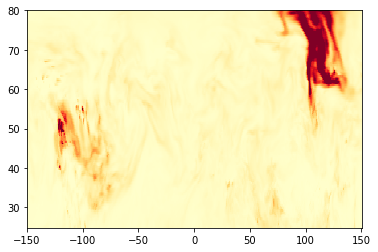

In [31]:
# Plot the data
#im = plt.pcolormesh(da.longitude, da.latitude, da[time_step,:,:], cmap='YlOrRd', vmin=0, vmax=2) 

im = plt.pcolormesh(da.longitude, da.latitude, da[time_step, :, :],
              cmap = 'YlOrRd', vmin=0, vmax=2)

In [32]:
# Add coastlines
ax.coastlines(color='black') 

<ipython-input-34-c7827c352628>:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im, fraction = 0.046, pad = 0.04)


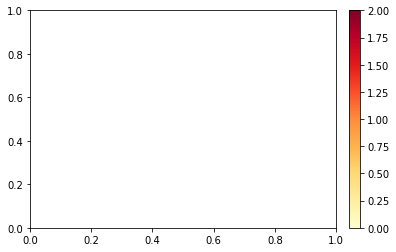

In [34]:
# Specify the colourbar
cbar = plt.colorbar(im, fraction = 0.046, pad = 0.04)

In [36]:
# Define the colourbar label
cbar.set_label('Organic Matter AOD at 550nm') 


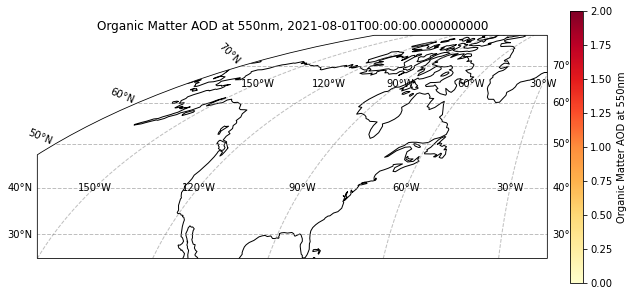

In [100]:
time_step = 0

# create the fig pannel
fig = plt.figure(figsize = (10, 5))


# use cartopy PlateCarree projection
#ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
ax = plt.subplot(1, 1, 1, projection = ccrs.Mollweide())


# specify geographical extent
ax.set_extent([-150, -50, 25, 80], crs = ccrs.PlateCarree())
#ax.set_extent([-150, -50, 25, 80], crs = ccrs.Mollweide())


# add lat/lon grid
ax.gridlines(draw_labels = True, linewidth = 1, color = "gray",
            alpha = 0.5, linestyle = "--")

# set the fig title
ax.set_title(f'Organic Matter AOD at 550nm, {da.time[time_step].values}',
            fontsize = 12)

# plot the data
im = plt.pcolormesh(da.longitude, da.latitude, da[time_step, :, :], 
              cmap = "YlOrRd", vmin = 0, vmax = 2)

# add coastlines
ax.coastlines(color = 'black')

# Specify the colourbar
cbar = plt.colorbar(im, fraction=0.046, pad=0.04) 

# Define the colourbar label
cbar.set_label('Organic Matter AOD at 550nm')


### To visualise the temporal dimension of this data set, we create an animation , with each frame corresponding to a time step. These include 00:00 and 12:00 at each day from 1 to 8 Aug.


In [55]:
da.time.shape

(16,)

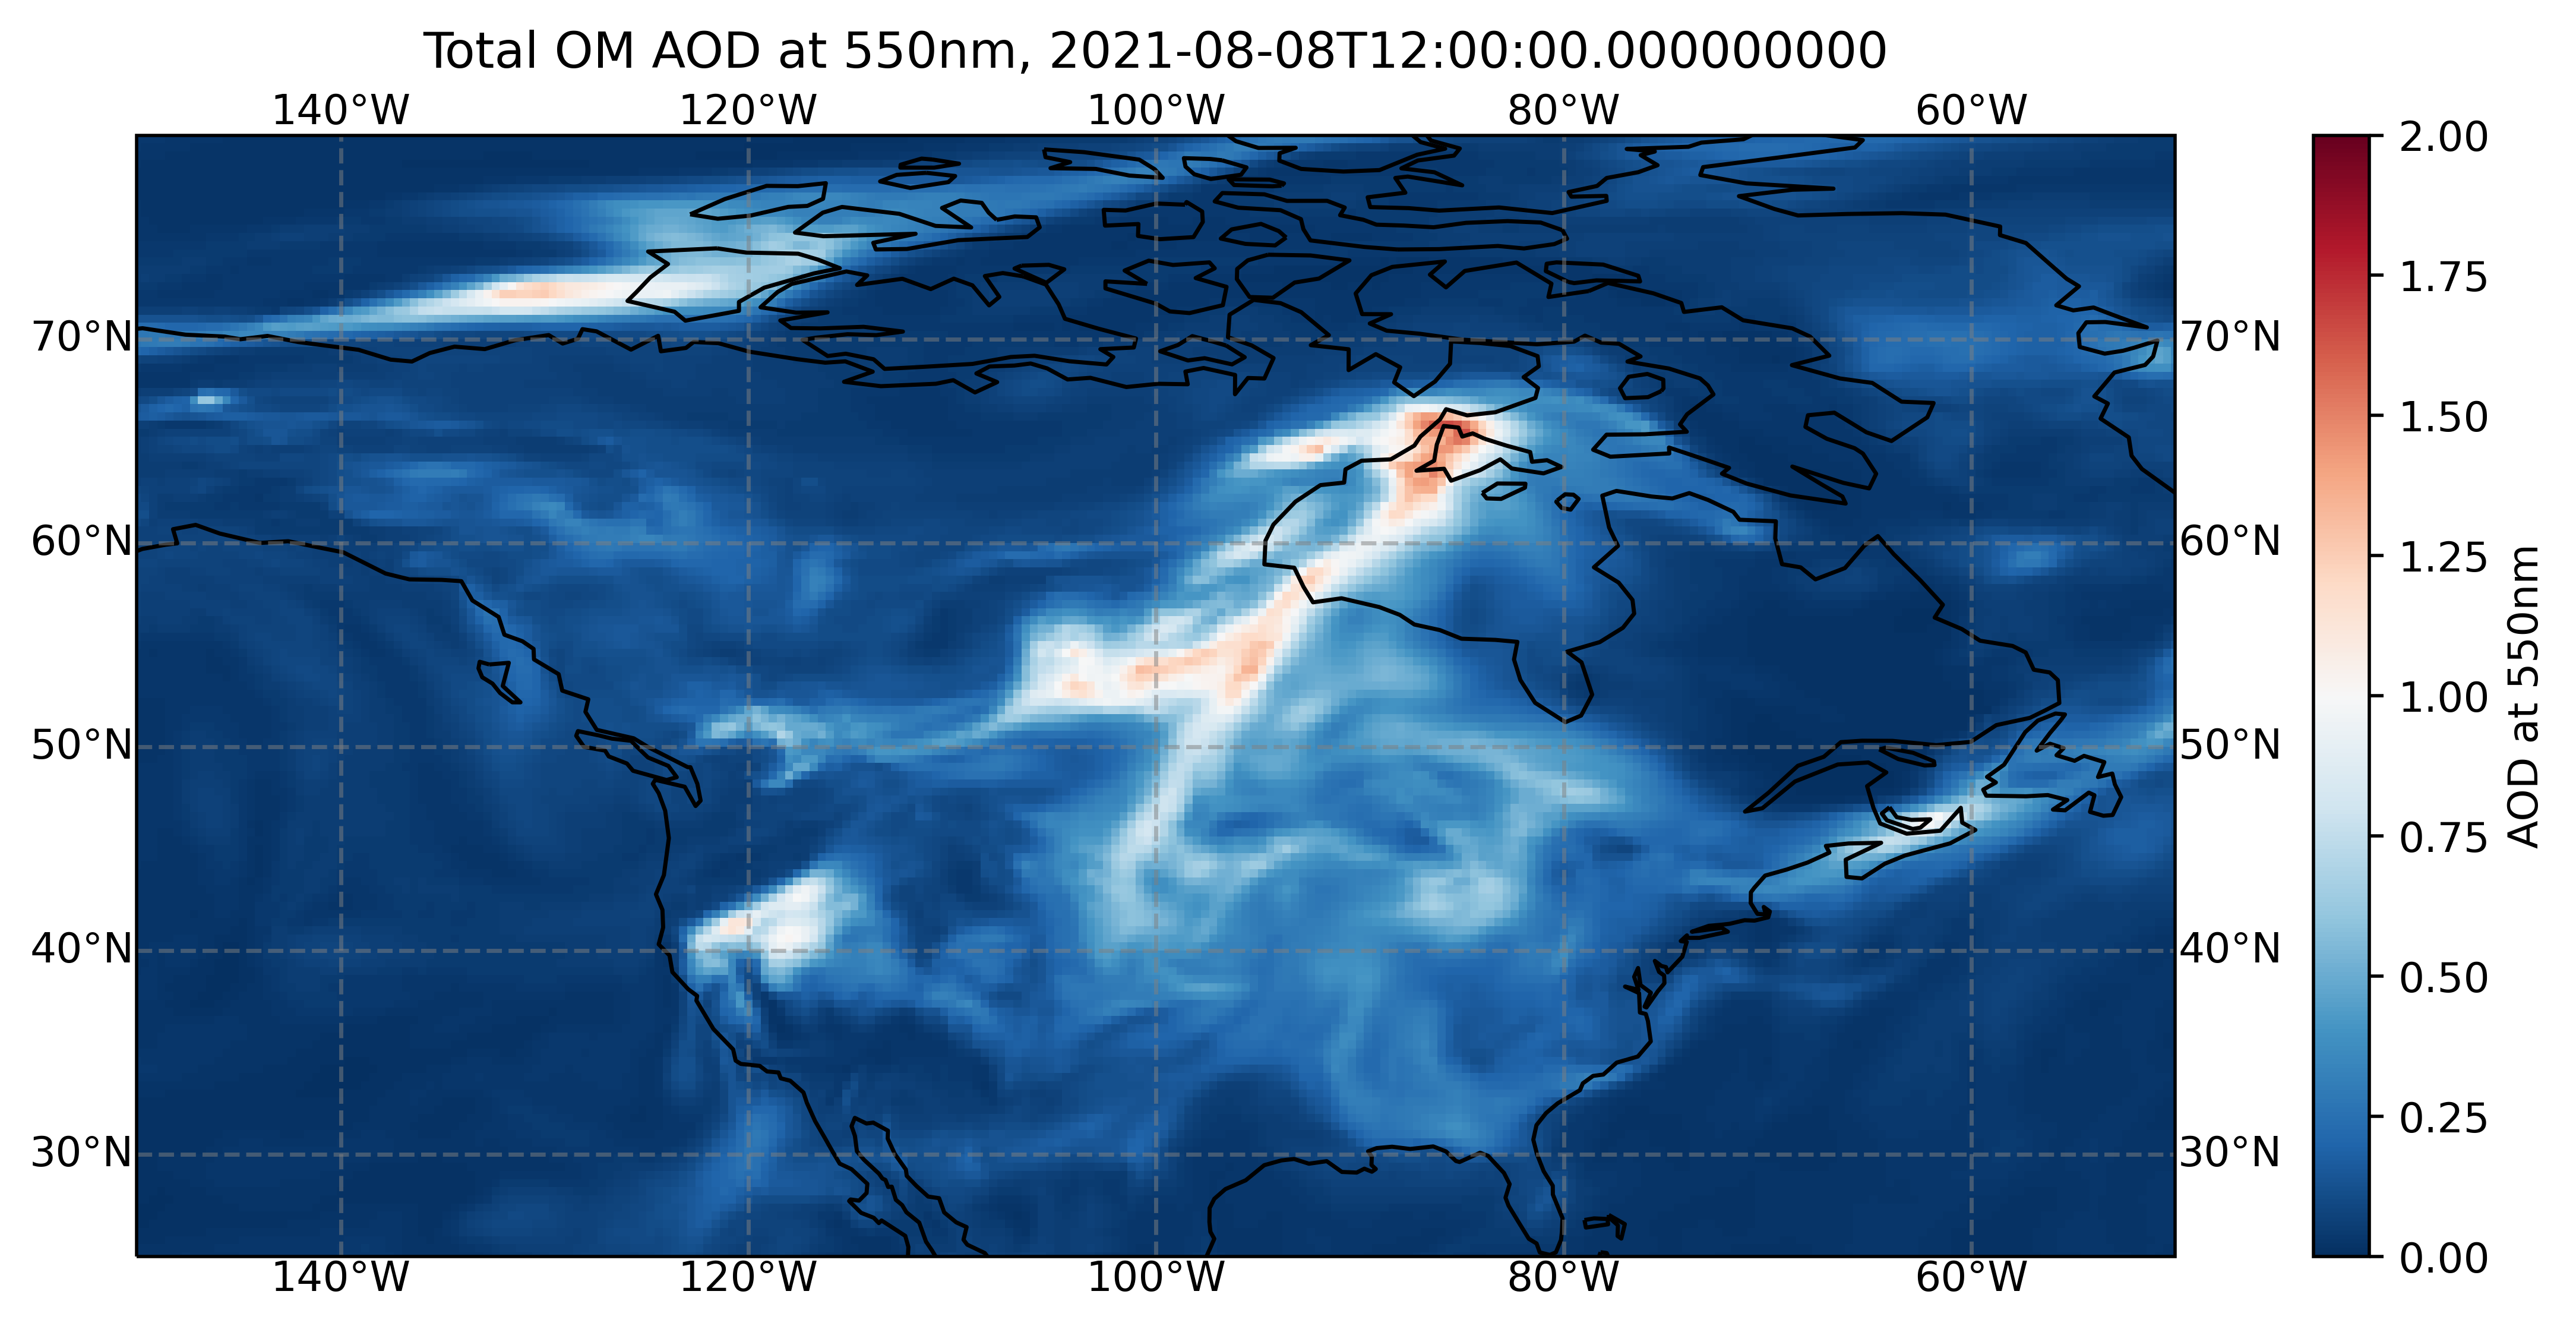

In [122]:
n = da.time.shape[0] # Number of frames in animation (= number of time-steps)

for i in range(n):
    fig = plt.figure(figsize = (10, 5), dpi = 500)
    ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    ax.set_extent([-150, -50, 25, 80], crs = ccrs.PlateCarree())
    ax.gridlines(draw_labels = True, color = 'gray', alpha = 0.5, linestyle = "--",
                linewidth = 1)
    ax.set_title(f'Total OM AOD at 550nm, {da.time[i].values}', fontsize = 12) 
    #im = plt.pcolormesh(da.longitude, da.latitude, da[i, :, :], cmap = 'YlOrRd', vmin = 0, vmax = 2)   
    im = plt.pcolormesh(da.longitude, da.latitude, da[i, :, :], cmap = 'RdBu_r', vmin = 0, vmax = 2)   
    ax.coastlines(color = "black")
    cbar = plt.colorbar(im, fraction = 0.046, pad = 0.06)
    cbar.set_label("AOD at 550nm")
    plt.show()
    sleep(0.01)
    clear_output(wait = True)
    # Clear the output (figure) before the next iteration (frame) of the animation
  
    

- The animation clearly shows the high values of total aerosol optical depth which appear to originate from the many different wildfires burning across North America in this period.

- This includes the Dixie fire, which, by August 6, had grown to become the largest single (i.e. non-complex) wildfire in California's history, and the second-largest wildfire overall.

## Change colormap

- change the colormap of the animation to that commonly used for CAMS products
- replace the cmap='YlOrRd', which is one of the default colormaps of Matplotlib, with cmap=camscmp
- which is the custom colormap below

In [105]:
from matplotlib.colors import ListedColormap

matrix = np.array([[256, 256, 256],
                   [210, 214, 234],
                   [167, 174, 214],
                   [135, 145, 190],
                   [162, 167, 144],
                   [189, 188, 101],
                   [215, 209, 57],
                   [242, 230, 11],
                   [243, 197, 10],
                   [245, 164, 8],
                   [247, 131, 6],
                   [248, 98, 5],
                   [250, 65, 3],
                   [252, 32, 1],
                   [254, 0, 0]])


n = 17 # Multiplication number

cams = np.ones((253, 4)) # Initial empty colormap, to be filled by the colours in 'matrix'.


# This loop fills in the empty 'cams' colormap with each of the 15 colours in 'matrix'
# multiplied by 'n'. Each colour is divided by 256 to normalise from 0 (black) to 1 (white). 
for i in range(matrix.shape[0]):
    cams[(i*n):((i+1)*n),:] = np.array([matrix[i,0]/256, matrix[i,1]/256, matrix[i,2]/256, 1])

    
# The final colormap is given by 'camscmp', which uses the Matplotlib class 'ListedColormap(Colormap)'
# to generate a colormap object from the list of colours provided by 'cams'.
camscmp = ListedColormap(cams)

# now go back to above animation to change the color

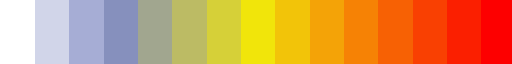

In [108]:
camscmp

## Compare atmospheric composition variables
- Try to understand what may be contributing to the total AOD values we have observed in the animation above
- View and compare the total AOD with the organic matter AOD and dust AOD, for one time step
- Also extend the range to include the entire northern hemisphere

In [120]:
variables = list(ds.keys())
variables

['omaod550', 'aod550', 'duaod550']

- Switch the order of variables to make total AOD (aod550) appear first. - This is so that when we iteratively plot the variables (below), total AOD appears first in the list. 
- This enables easier comparison of total AOD with the constituent variables of organic matter and dust AOD.

In [123]:
variables[0], variables[1] = variables[1], variables[0]

In [124]:
variables

['aod550', 'omaod550', 'duaod550']

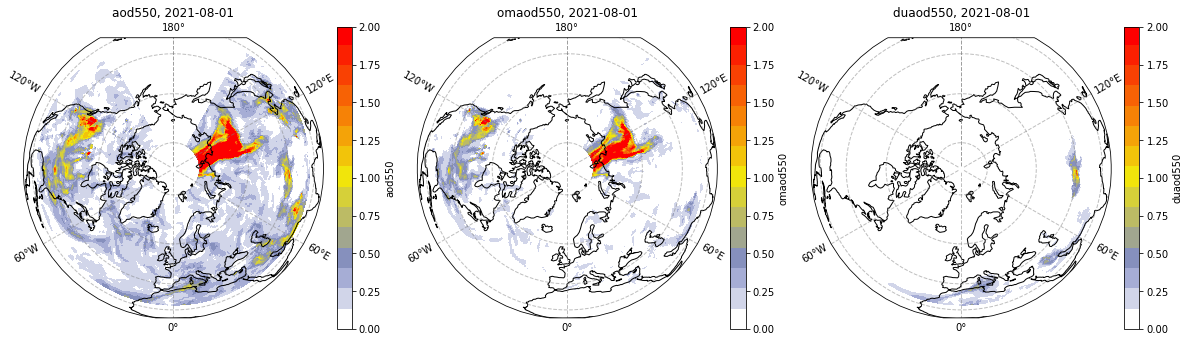

In [175]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10), 
                        subplot_kw={'projection': ccrs.Orthographic(central_latitude=90)})


for i in range(3):
    da = ds[variables[i]]
    axs[i].gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
    axs[i].set_title(f'{variables[i]}, {str(da.time[1].values)[:-19]}', fontsize=12) # Set figure title
    im = axs[i].pcolormesh(da.longitude, da.latitude, da[0,:,:], # only 1 time step
                            transform = ccrs.PlateCarree(), 
                           cmap=camscmp, vmin=0, vmax=2)
    axs[i].coastlines(color='black') # Add coastlines
    cbar = fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04) # Specify the colourbar
    cbar.set_label(variables[i]) # Define the colourbar label

        
plt.show() # Display the figure
fig.savefig('./AOD_NHem.png') # Save the figure    

In [166]:
range(3)

range(0, 3)

In [174]:
str(da.time[1].values)[:-19]

'2021-08-01'

### Try animation for 3 plots 
- unsuccessful

In [140]:
da = ds[variables[1]]
da

<xarray.DataArray 'omaod550' (time: 16, latitude: 138, longitude: 751)>
[1658208 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... 149.2 149.6 150.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T12:00:00
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

In [142]:
da.time.shape[0]

16

In [137]:
str(da.time[1].values)[:-19] # delete the last 19 characters

'2021-08-01'

In [ ]:
da

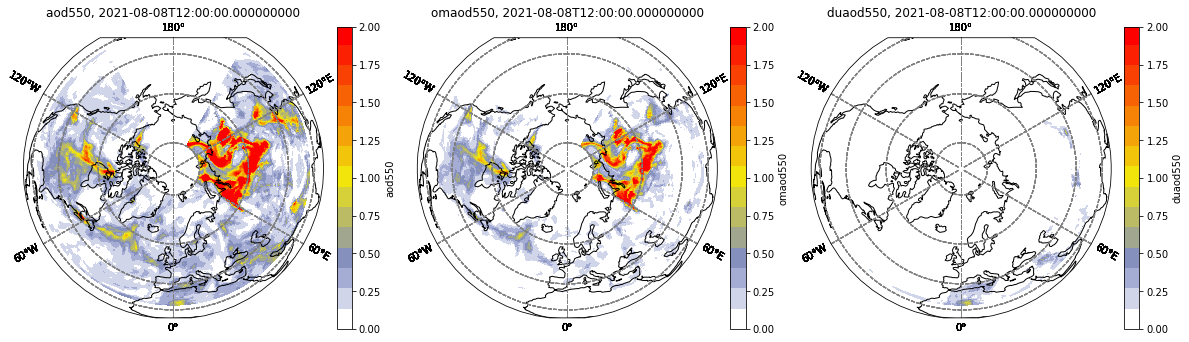

In [193]:
n = da.time.shape[0]

fig, axs = plt.subplots(1, 3, figsize = (20, 10), 
                        subplot_kw={'projection': ccrs.Orthographic(central_latitude=90)})


for i in range(3):
    for j in range(n):
        da = ds[variables[i]]
        axs[i].gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
        axs[i].set_title(f'{variables[i]}, {str(da.time[j].values)}', fontsize=12) # Set figure title
        im = axs[i].pcolormesh(da.longitude, da.latitude, da[j,:,:], # iterste over each time step
                                transform = ccrs.PlateCarree(), 
                               cmap = camscmp, vmin = 0, vmax = 2)
        
        sleep(0.01)
        clear_output(wait = True)
    axs[i].coastlines(color='black') # Add coastlines
    cbar = fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04) # Specify the colourbar
    cbar.set_label(variables[i]) # Define the colourbar label

plt.show()# Display the figure
    

#fig.savefig('./AOD_NHem.png') # Save the figure    

So, high values of AOD seem to be mainly due to organic matter in North America and Siberia, which saw many wildfire activity in this period, while further south we can see a dust contribution

## CAMS global reanalysis (EAC4) monthly averaged fields
- The fourth generation ECMWF global reanalysis of atmospheric composition (EAC4)
- Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using a model of the atmosphere based on the laws of physics and chemistry.
- will use the monthly averaged version of this data 
- to analyse August climatology of the distribution of Carbon Monoxide in the Northern Hemisphere at different vertical layers in the atmosphere
- 

### Download data using API

In [ ]:
ADS_URL = "https://ads.atmosphere.copernicus.eu/api/v2"

ADS_KEY = "8089:4c1cd739-4ef0-43c2-be7f-3120e8d7c96f"

In [194]:
import cdsapi

c = cdsapi.Client(url = ADS_URL, key = ADS_KEY)

c.retrieve(
    'cams-global-reanalysis-eac4-monthly',
    {
        'format': 'netcdf',
        'variable': 'carbon_monoxide',
        'pressure_level': [
            '100', '150', '200',
            '250', '300', '400',
            '500', '600', '700',
            '800', '850', '900',
            '925', '950', '1000',
        ],
        'model_level': '60',
        'year': [
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': '08',
        'product_type': 'monthly_mean',
        'area': [
            90, -180, 0,
            180,
        ],
    },
    'download.nc')


/Users/xchen/opt/miniconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-12-07 10:54:16,474 INFO Welcome to the CDS
2021-12-07 10:54:16,480 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-reanalysis-eac4-monthly
/Users/xchen/opt/miniconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-12-07 10:54:16,545 INFO Request is completed
2021-12-07 10:54:16,547 INFO Downloading https://download-0003.copernicus-atmosphere

Result(content_length=33461782,content_type=application/zip,location=https://download-0003.copernicus-atmosphere.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1637880838.2016644-31893-9-36c5d906-eee0-44bd-9ad1-663c34fae020.zip)

### read the data in the zipfile

In [196]:
# Create a ZipFile Object and load zip file in it
with ZipFile(f'./EAC4_AugClim_CO.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall(path = f'./EAC4_AugClim_CO')


In [198]:
fn = f'./EAC4_AugClim_CO/levtype_pl.nc'
ds_co = xr.open_dataset(fn)  # ds = data set
ds_co

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 121, level: 15, time: 18)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... 2.25 1.5 0.75 0.0
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000
  * time       (time) datetime64[ns] 2003-08-01 2004-08-01 ... 2020-08-01
Data variables:
    co         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-25 22:53:57 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

### The data includes monthly averaged CO in every August from 2003 to 2020, for the Northern Hemisphere

In [199]:
# create an Xarray Data Array for the variable CO
    
da_co = ds_co['co']   # da = data array
da_co

<xarray.DataArray 'co' (time: 18, level: 15, latitude: 121, longitude: 480)>
[15681600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... 2.25 1.5 0.75 0.0
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000
  * time       (time) datetime64[ns] 2003-08-01 2004-08-01 ... 2020-08-01
Attributes:
    units:          kg kg**-1
    long_name:      Carbon monoxide mass mixing ratio
    standard_name:  mass_fraction_of_carbon_monoxide_in_air

### Calculate climatology for August
- create the climatology for August by taking the __mean of all years__

In [202]:
clim = da_co.mean('time')
clim

<xarray.DataArray 'co' (level: 15, latitude: 121, longitude: 480)>
array([[[1.8648885e-08, 1.8648885e-08, 1.8648885e-08, ...,
         1.8648885e-08, 1.8648885e-08, 1.8648885e-08],
        [1.8675260e-08, 1.8675260e-08, 1.8675260e-08, ...,
         1.8675260e-08, 1.8675260e-08, 1.8675260e-08],
        [1.8648784e-08, 1.8675159e-08, 1.8675159e-08, ...,
         1.8648784e-08, 1.8648784e-08, 1.8648784e-08],
        ...,
        [4.5167024e-08, 4.5167024e-08, 4.5193399e-08, ...,
         4.5140851e-08, 4.5167226e-08, 4.5219977e-08],
        [4.5061523e-08, 4.5061523e-08, 4.5087898e-08, ...,
         4.5087898e-08, 4.5114273e-08, 4.5140649e-08],
        [4.5140748e-08, 4.5087997e-08, 4.5114373e-08, ...,
         4.5140748e-08, 4.5140748e-08, 4.5140748e-08]],

       [[2.6854650e-08, 2.6854650e-08, 2.6854650e-08, ...,
         2.6854650e-08, 2.6854650e-08, 2.6854650e-08],
        [2.6749047e-08, 2.6749047e-08, 2.6749047e-08, ...,
         2.6749047e-08, 2.6749047e-08, 2.6749047e-08],
        [2.6775423e-08, 2.6775423e-08, 2.6775423e-08, ...,
         2.6775423e-08, 2.6775423e-08, 2.6775423e-08],
...
        [5.6697697e-08, 5.6697800e-08, 5.6855949e-08, ...,
         5.6170091e-08, 5.6433944e-08, 5.6565820e-08],
        [5.6882428e-08, 5.6935178e-08, 5.7014304e-08, ...,
         5.6513070e-08, 5.6697697e-08, 5.6829574e-08],
        [5.7014404e-08, 5.7093629e-08, 5.7172656e-08, ...,
         5.6724073e-08, 5.6803199e-08, 5.7014404e-08]],

       [[9.2925902e-08, 9.2925902e-08, 9.2925902e-08, ...,
         9.2925902e-08, 9.2925902e-08, 9.2925902e-08],
        [9.2952483e-08, 9.2952483e-08, 9.2952483e-08, ...,
         9.2952483e-08, 9.2952483e-08, 9.2952483e-08],
        [9.2846875e-08, 9.2846875e-08, 9.2846875e-08, ...,
         9.2820500e-08, 9.2846875e-08, 9.2846875e-08],
        ...,
        [5.6671322e-08, 5.6776926e-08, 5.6856052e-08, ...,
         5.6170091e-08, 5.6381193e-08, 5.6539445e-08],
        [5.6855949e-08, 5.6882428e-08, 5.7014404e-08, ...,
         5.6433944e-08, 5.6671322e-08, 5.6724073e-08],
        [5.7067254e-08, 5.7199131e-08, 5.7225506e-08, ...,
         5.6776823e-08, 5.6882325e-08, 5.6961554e-08]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... 2.25 1.5 0.75 0.0
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000

### Create meridional mean plot
- To visualise the August CO climatology as a _function_ of __longitude__ and __altitude__, will create a __meridional mean plot__.
- To create such a two dimensional plot we will need to __average over the latitudinal axis__.

In [204]:
# Average (mean) over the latitudinal axis
clim_MMP = clim.mean(dim = 'latitude')
clim_MMP

<xarray.DataArray 'co' (level: 15, longitude: 480)>
array([[3.2777795e-08, 3.2755775e-08, 3.2737233e-08, ..., 3.2858942e-08,
        3.2830151e-08, 3.2805282e-08],
       [4.5772644e-08, 4.5698943e-08, 4.5626340e-08, ..., 4.6029996e-08,
        4.5942976e-08, 4.5850058e-08],
       [5.5856834e-08, 5.5798370e-08, 5.5739289e-08, ..., 5.6083625e-08,
        5.6011686e-08, 5.5935352e-08],
       ...,
       [8.4010168e-08, 8.3815223e-08, 8.3634667e-08, ..., 8.4710777e-08,
        8.4527166e-08, 8.4274681e-08],
       [8.3331983e-08, 8.3113491e-08, 8.2923108e-08, ..., 8.4059415e-08,
        8.3852271e-08, 8.3594941e-08],
       [8.2557840e-08, 8.2345672e-08, 8.2151566e-08, ..., 8.3273065e-08,
        8.3070923e-08, 8.2798998e-08]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000

### Now we can plot and visualise our data

In [227]:
# The y axis (pressure levels) is a non-linear scale
# so to ensure equal spacing between the values, we create a regular scale

np.arange(clim_MMP.level.shape[0])
np.arange(clim_MMP.level.shape[0]) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [216]:
y = np.arange(clim_MMP.level.shape[0]) + 1
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [228]:
y = y[::-1]
y

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

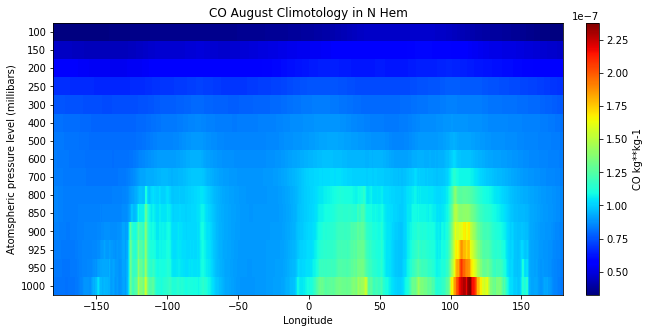

In [231]:
# Define the figure and specify size
fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(1, 1, 1)


# Set x and y axis tickmarks, labels and fig title
ax.yaxis.set_ticks(y)
ax.yaxis.set_ticklabels(clim_MMP.level.values)
ax.set_xlabel("Longitude")
ax.set_ylabel("Atomspheric pressure level (millibars)")
ax.set_title("CO August Climotology in N Hem", fontsize = 12)


# As the presure levels (25) are much less than the longitudes (480),
# we need to ensure the plot fits into the size of the figure.
ax.set_aspect('auto')


# plot the figure and specify a colourbar
im = plt.pcolormesh(clim_MMP.longitude, y, clim_MMP, cmap = 'jet')
cbar = plt.colorbar(im, fraction = 0.046, pad = 0.04)
cbar.set_label("CO kg**kg-1")


In [232]:
fig.savefig("./CO_NHem_Aug_clim.png")


In [153]:
str(da.time[2].values)

'2021-08-02T00:00:00.000000000'

In [177]:
n = da.time.shape[0]
n

16

In [184]:
range(n)

range(0, 16)

In [126]:
da[0,:,:]

<xarray.DataArray 'omaod550' (latitude: 138, longitude: 751)>
[103638 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... 149.2 149.6 150.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
    time       datetime64[ns] 2021-08-01
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

### Export as png or jpg
ref: https://github.com/giswqs/geemap/blob/master/examples/notebooks/21_export_map_to_html_png.ipynb



In [83]:
import os

In [84]:
download_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
if not os.path.exists(download_dir):
    os.makedirs(download_dir)


In [85]:
jpg_file = os.path.join(download_dir, 'my_animation.jpg')
Map.to_image(outfile = jpg_file, monitor = 1)

NameError: name 'Map' is not defined

In [69]:
da[2]

<xarray.DataArray 'omaod550' (latitude: 138, longitude: 751)>
[103638 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... 149.2 149.6 150.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
    time       datetime64[ns] 2021-08-02
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

In [56]:
da

<xarray.DataArray 'omaod550' (time: 16, latitude: 138, longitude: 751)>
[1658208 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... 149.2 149.6 150.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T12:00:00
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

In [30]:
??plt.pcolormesh

In [33]:
??plt.colorbar

In [62]:
??plt.subplot